<a href="https://colab.research.google.com/github/Arina2903/activity-monitoring-ml/blob/main/activity_monitoring_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Serialization
import pickle  # to serialize objects for permanent storage

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tools
from scipy import stats

# Machine Learning
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Notebook display utilities
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

# Enable inline plotting (Jupyter Notebook only)
%matplotlib inline

# Seaborn style settings
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# Reproducibility
RANDOM_SEED = 42


In [ ]:
#Define Column Names
columns = ['user','activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

#Read the dataset
df  = pd.read_csv('https://raw.githubusercontent.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/master/data/WISDM_ar_v1.1_raw.txt',
                  header=None, names=columns, on_bad_lines='skip')

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for missing values before dropping
missing_values_before = df.isnull().sum()
print("Missing values before dropping:\n", missing_values_before)

#Drop NaN Values (removes any rows that contain missing values)
df = df.dropna()

#Display the First Few Rows
df.head()

Missing values before dropping:
 user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       1
dtype: int64


,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,1970-01-01 13:38:25.962326,-0.694638,12.680544,0.503953
1,33,Jogging,1970-01-01 13:38:26.062271,5.012288,11.264028,0.953424
2,33,Jogging,1970-01-01 13:38:26.112167,4.903325,10.882658,-0.081722
3,33,Jogging,1970-01-01 13:38:26.222305,-0.612916,18.496431,3.023717
4,33,Jogging,1970-01-01 13:38:26.332290,-1.184970,12.108489,7.205164


In [ ]:
#Calculate the Range of timestamps
timestamp_range = df['timestamp'].agg(['min', 'max'])

#Print the Timestamp Range
print(f"Timestamp range: \n{timestamp_range}")

Timestamp range: 
min   1970-01-01 00:00:00.000000
max   1970-01-03 10:09:57.361451
Name: timestamp, dtype: datetime64[ns]


In [ ]:
# Define the start and end dates
start_date = "1970-01-01"
end_date = "1970-01-03"

# Generate time periods for the specified dates, in 60-minute intervals
time_periods = pd.date_range(start=start_date, end=end_date, freq='H')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2812\1147238665.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_periods = pd.date_range(start=start_date, end=end_date, freq='H')


In [ ]:
#Count the occurrences of each unique activity
countOfActivity=df['activity'].value_counts()

#Print the counts of each activity
print(countOfActivity)

activity
Walking       418393
Jogging       336445
Upstairs      122869
Downstairs    100425
Sitting        59939
Standing       48394
Name: count, dtype: int64


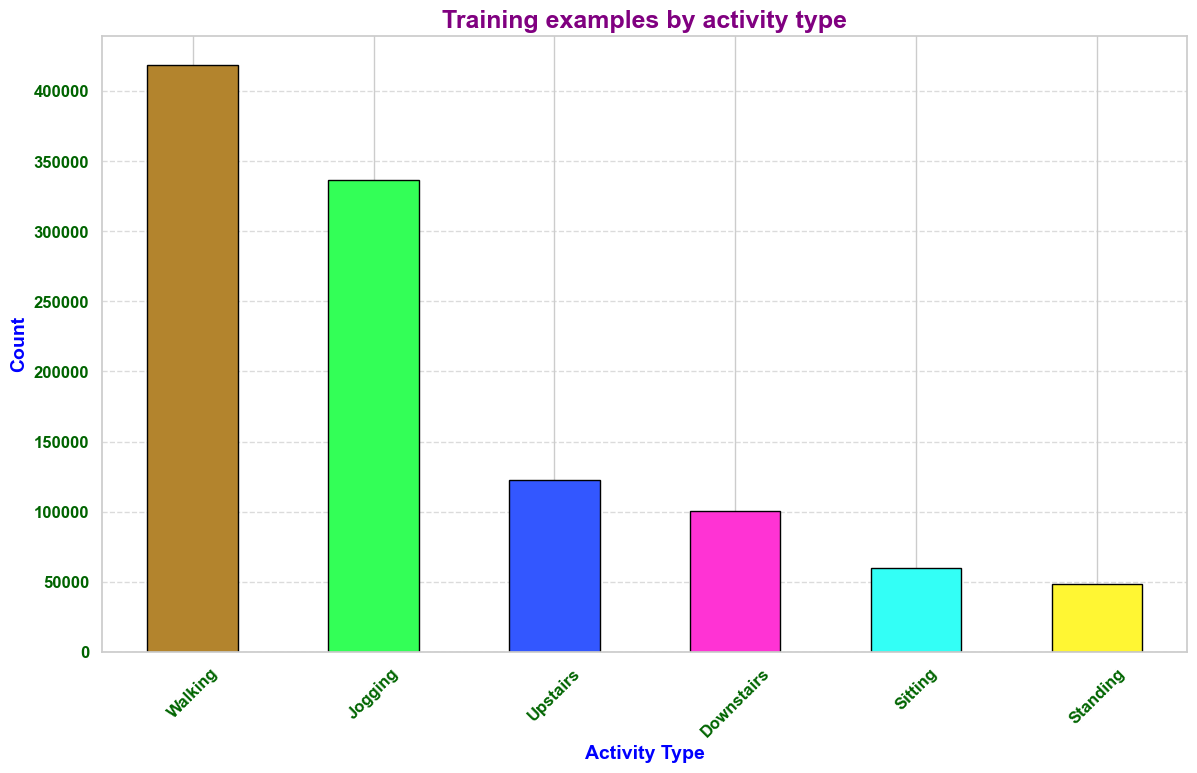

In [ ]:
# Customizing the plot
plt.figure(figsize=(14, 8))
colors = ['#b3842d', '#33FF57', '#3357FF', '#FF33D4', '#33FFF6', '#FFF633']  # Custom colors avoiding red
countOfActivity.plot(kind='bar', color=colors, edgecolor='black')

# Adding title with custom font
plt.title('Training examples by activity type', fontsize=18, fontweight='bold', color='purple')

# Customizing x and y labels
plt.xlabel('Activity Type', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='blue')

# Customizing the ticks
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='darkgreen')
plt.yticks(fontsize=12, fontweight='bold', color='darkgreen')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


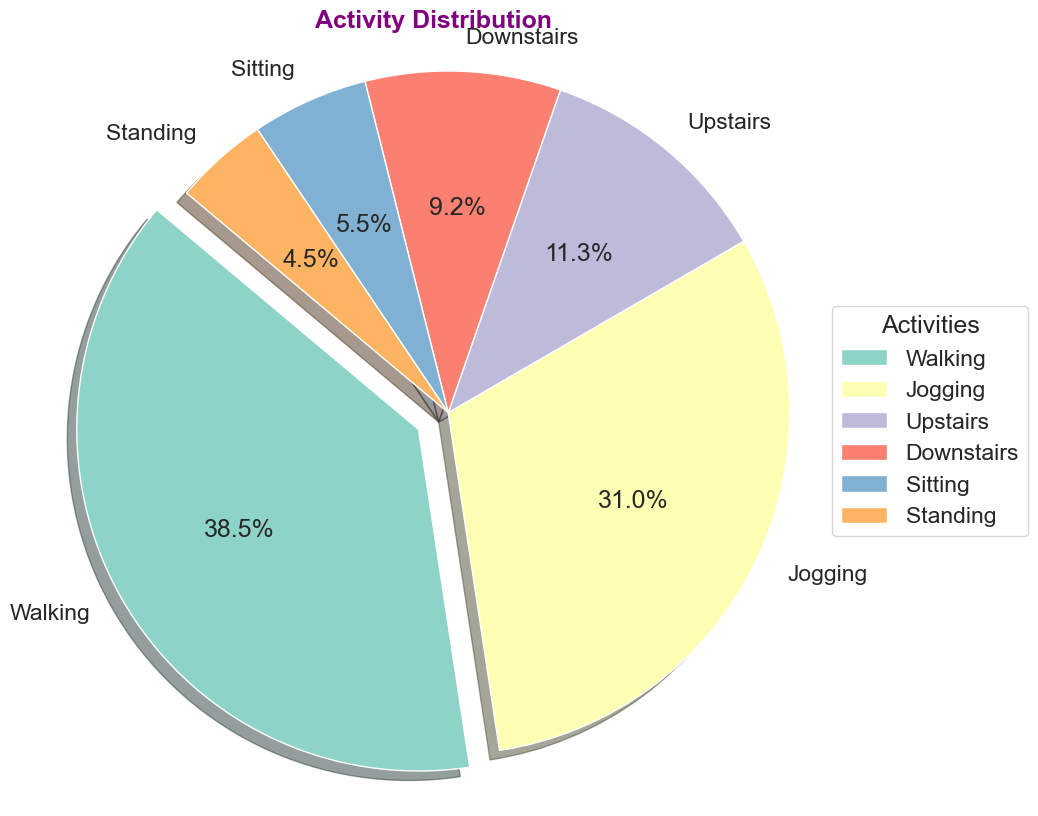

In [ ]:
# Pie chart data
labels = countOfActivity.index
sizes = countOfActivity.values
colors = plt.cm.Set3(range(len(labels)))  # Different color map

# Explode the first slice slightly to highlight it
explode = [0.1] + [0] * (len(labels) - 1)

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)

# Adding title with custom font
plt.title('Activity Distribution', fontsize=18, fontweight='bold', color='purple')

# Adding a legend
plt.legend(labels, title="Activities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


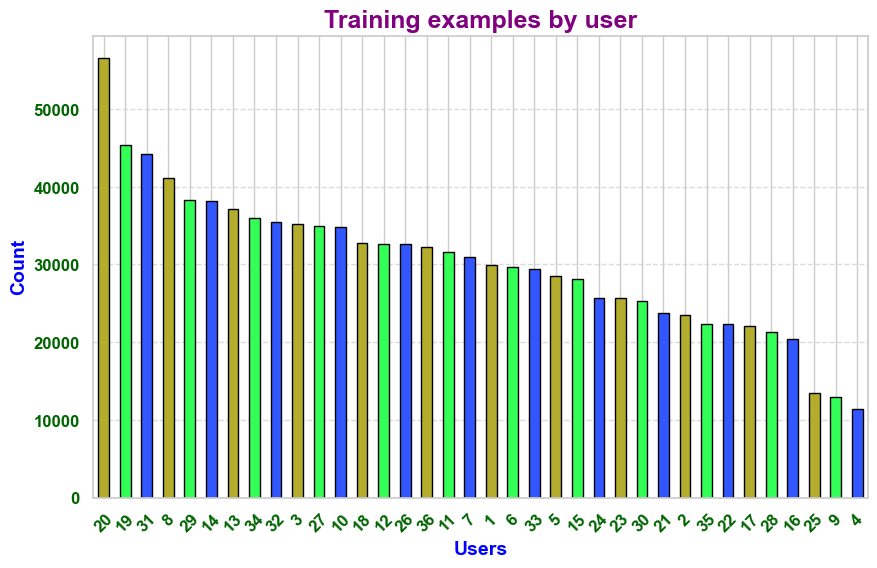

In [ ]:
# Customizing the plot
plt.figure(figsize=(10, 6))
colors = ['#b3ac2d', '#33FF57', '#3357FF']  # Custom colors for each bar
df['user'].value_counts().plot(kind='bar', color=colors, edgecolor='black')

# Adding title with custom font
plt.title('Training examples by user', fontsize=18, fontweight='bold', color='purple')

# Customizing x and y labels
plt.xlabel('Users', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='blue')

# Customizing the ticks
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='darkgreen')
plt.yticks(fontsize=12, fontweight='bold', color='darkgreen')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


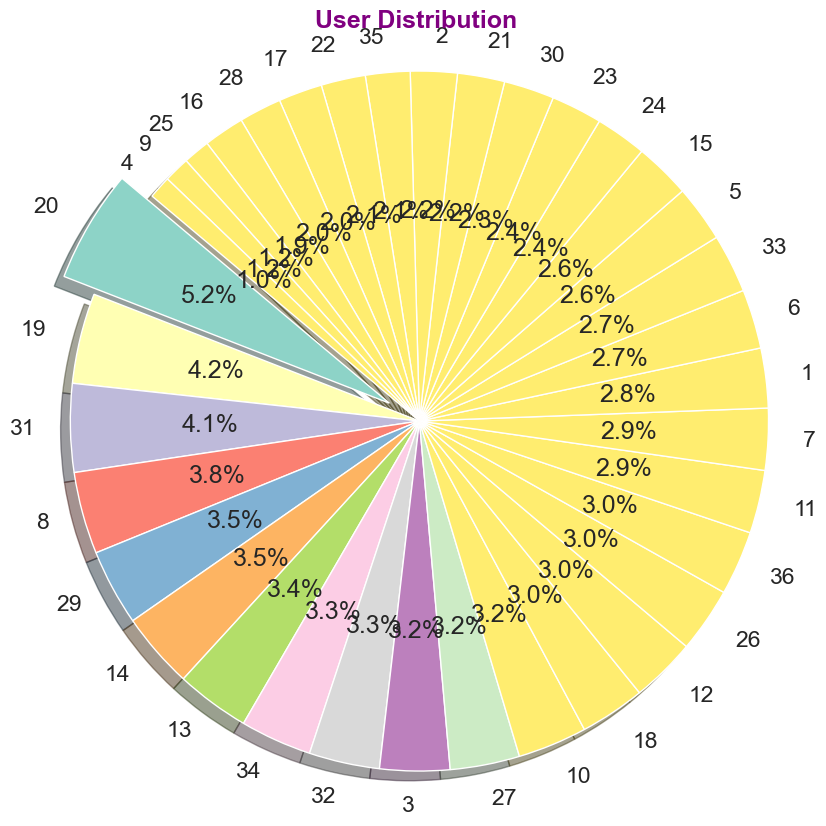

In [ ]:
# Aggregating the counts of each user
user_counts = df['user'].value_counts()

# Pie chart data
labels = user_counts.index
sizes = user_counts.values
colors = plt.cm.Set3(range(len(labels)))  # Different color map

# Explode the first slice slightly to highlight it
explode = [0.1] + [0] * (len(labels) - 1)

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)

# Adding title with custom font
plt.title('User Distribution', fontsize=18, fontweight='bold', color='purple')


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
# Check the number of unique users
unique_users = df['user'].nunique()
print(f"Number of unique users: {unique_users}")

# Display the first few rows for different users
sample_users = df['user'].unique()[:5]  # Get a sample of unique users (adjust the number as needed)
for user in sample_users:
    print(f"\nData for user {user}:")
    print(df[df['user'] == user].head())


Number of unique users: 36

Data for user 33:
   user activity                  timestamp    x-axis     y-axis    z-axis
0    33  Jogging 1970-01-01 13:38:25.962326 -0.694638  12.680544  0.503953
1    33  Jogging 1970-01-01 13:38:26.062271  5.012288  11.264028  0.953424
2    33  Jogging 1970-01-01 13:38:26.112167  4.903325  10.882658 -0.081722
3    33  Jogging 1970-01-01 13:38:26.222305 -0.612916  18.496431  3.023717
4    33  Jogging 1970-01-01 13:38:26.332290 -1.184970  12.108489  7.205164

Data for user 17:
      user activity                  timestamp    x-axis     y-axis    z-axis
8489    17  Walking 1970-01-01 16:04:29.902574  0.572055   9.806650 -0.531194
8490    17  Walking 1970-01-01 16:04:30.012316 -0.000000  10.188020 -0.572055
8491    17  Walking 1970-01-01 16:04:30.122301 -0.231546   9.847511 -0.694638
8492    17  Walking 1970-01-01 16:04:30.222246  0.149824  10.079058 -0.503953
8493    17  Walking 1970-01-01 16:04:30.332292  0.149824  10.147159 -0.612916

Data for user 20

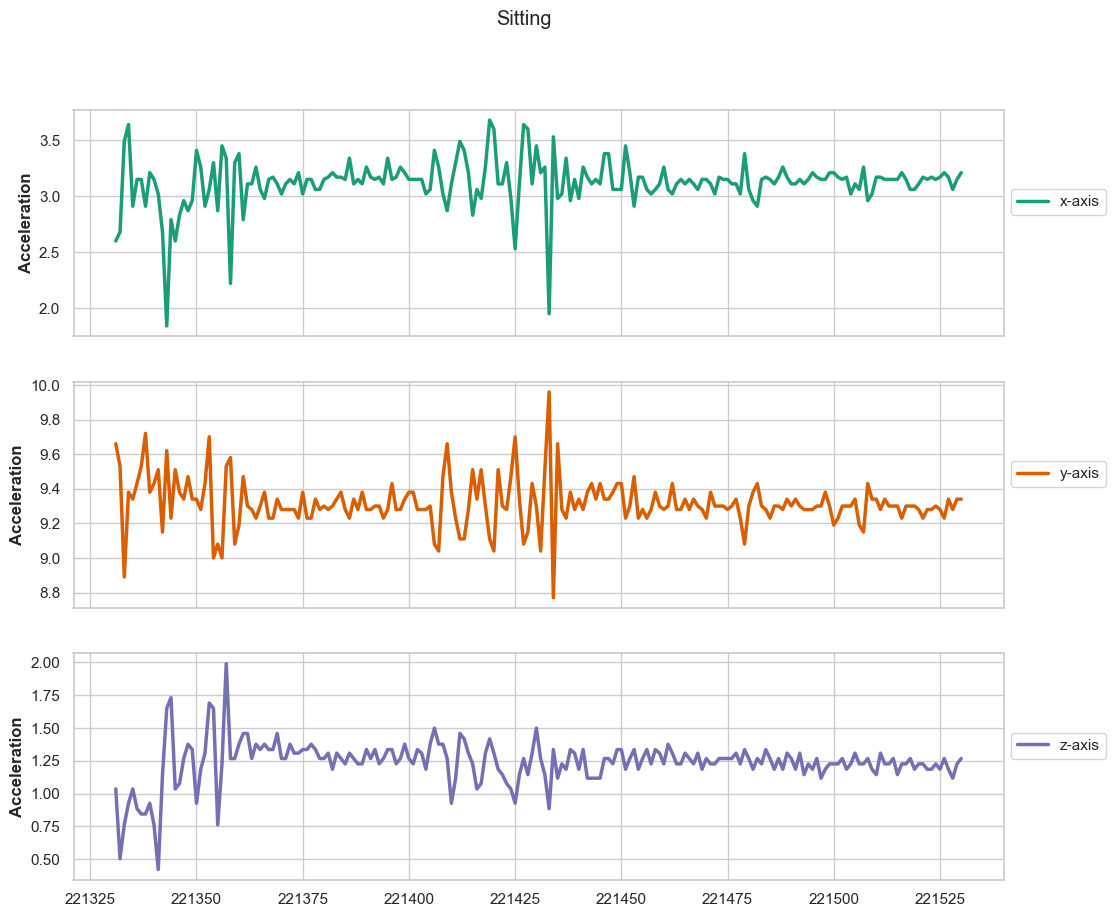

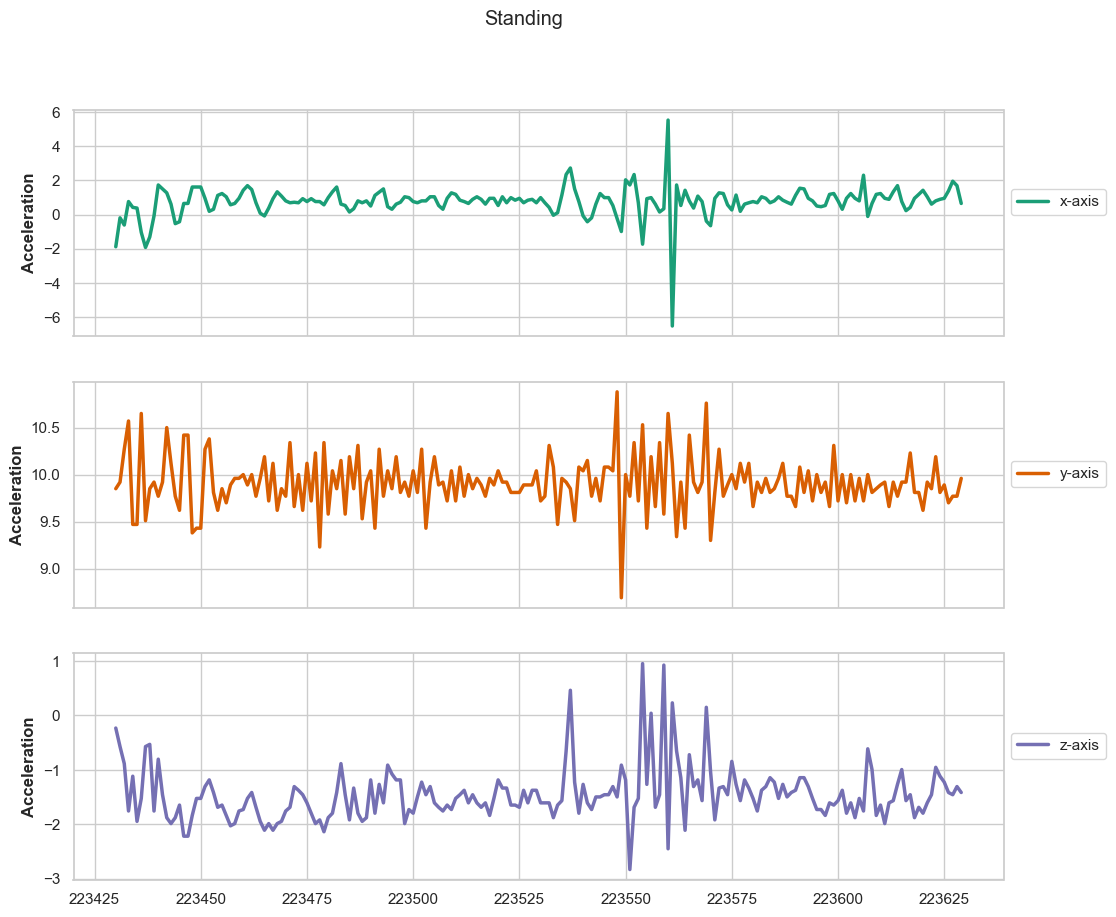

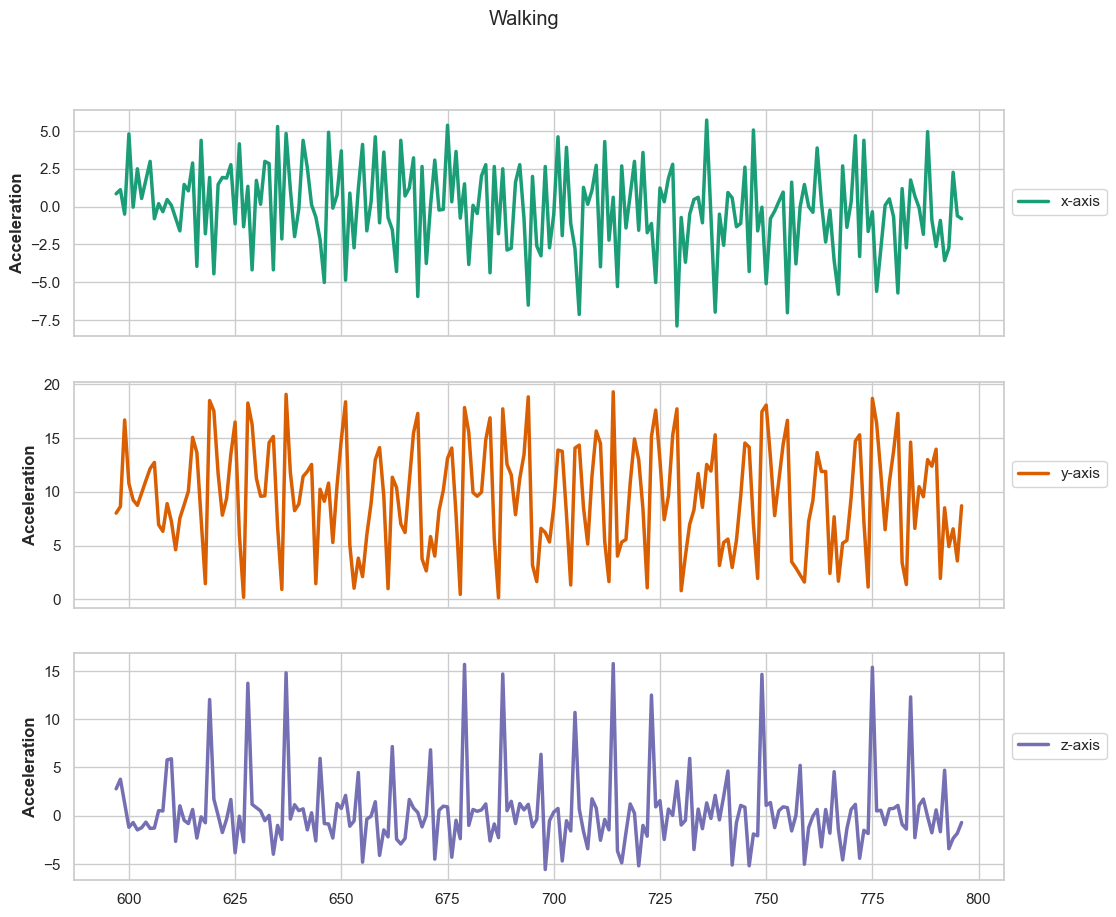

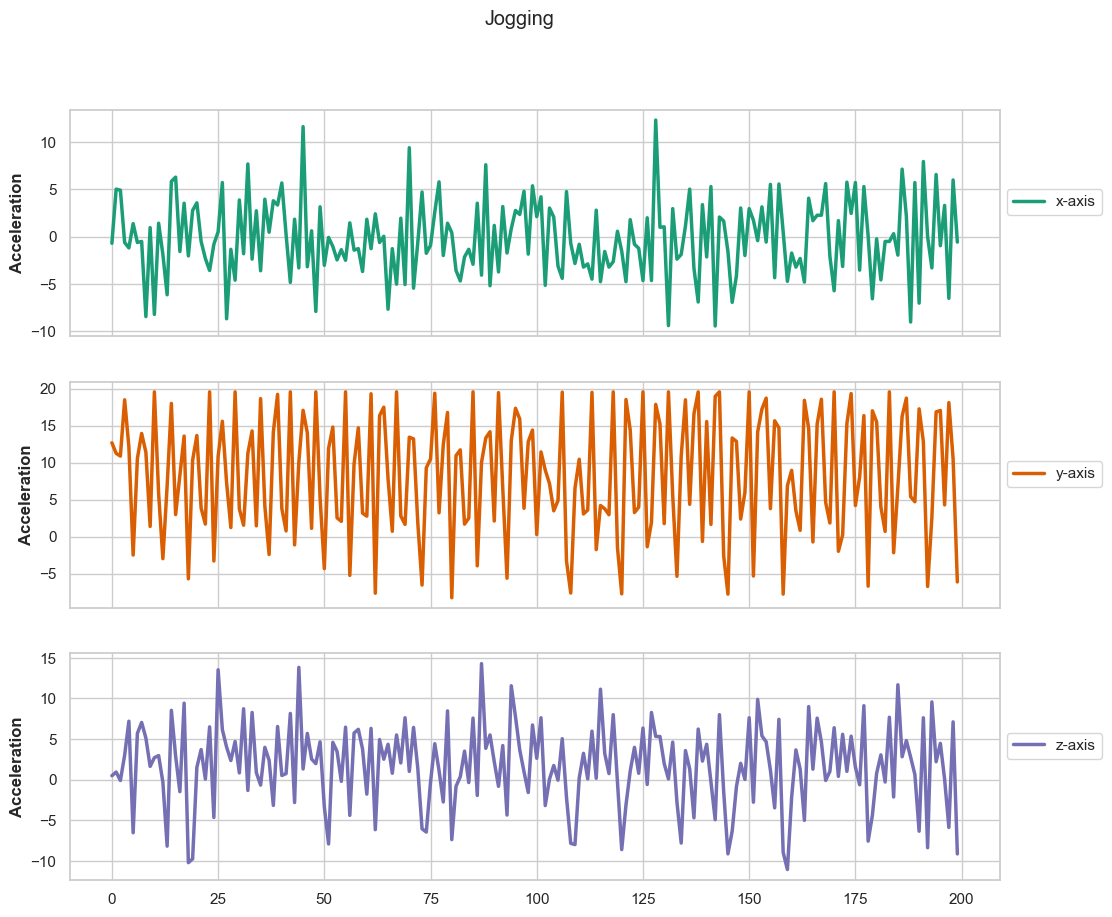

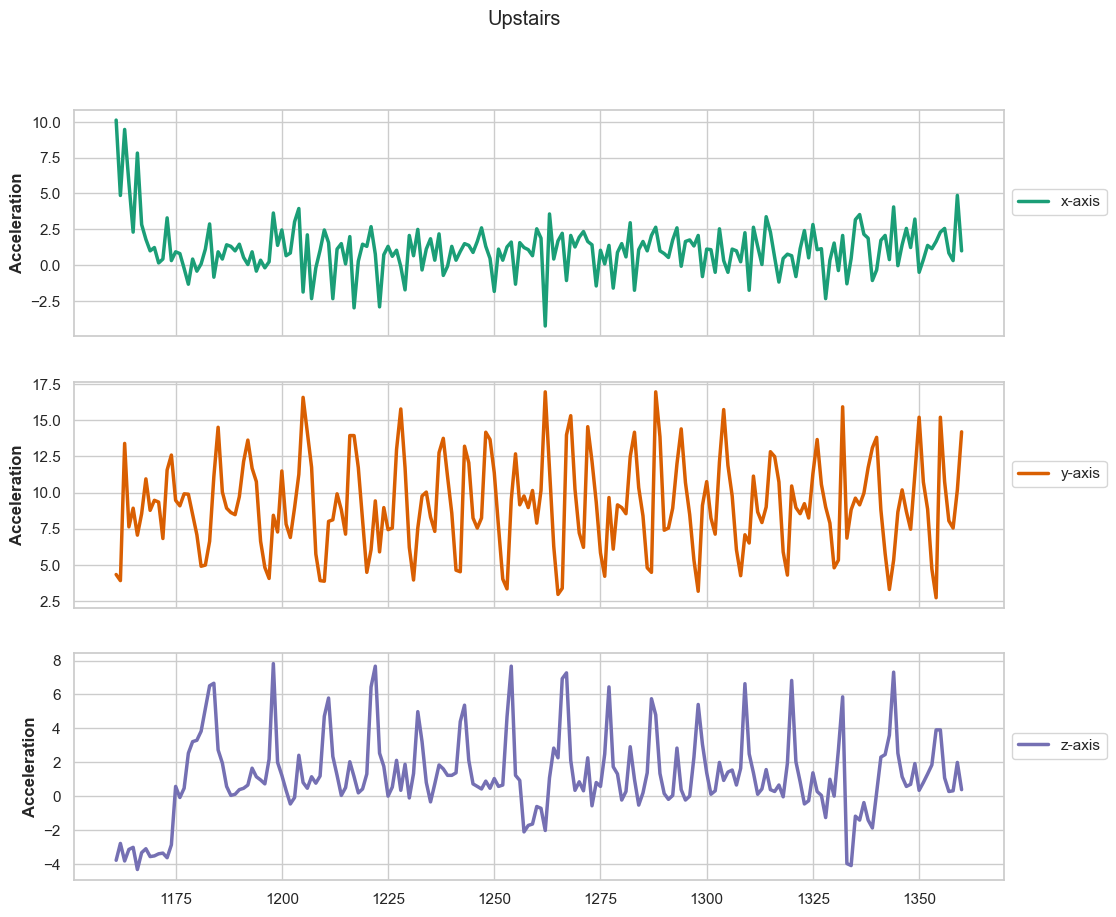

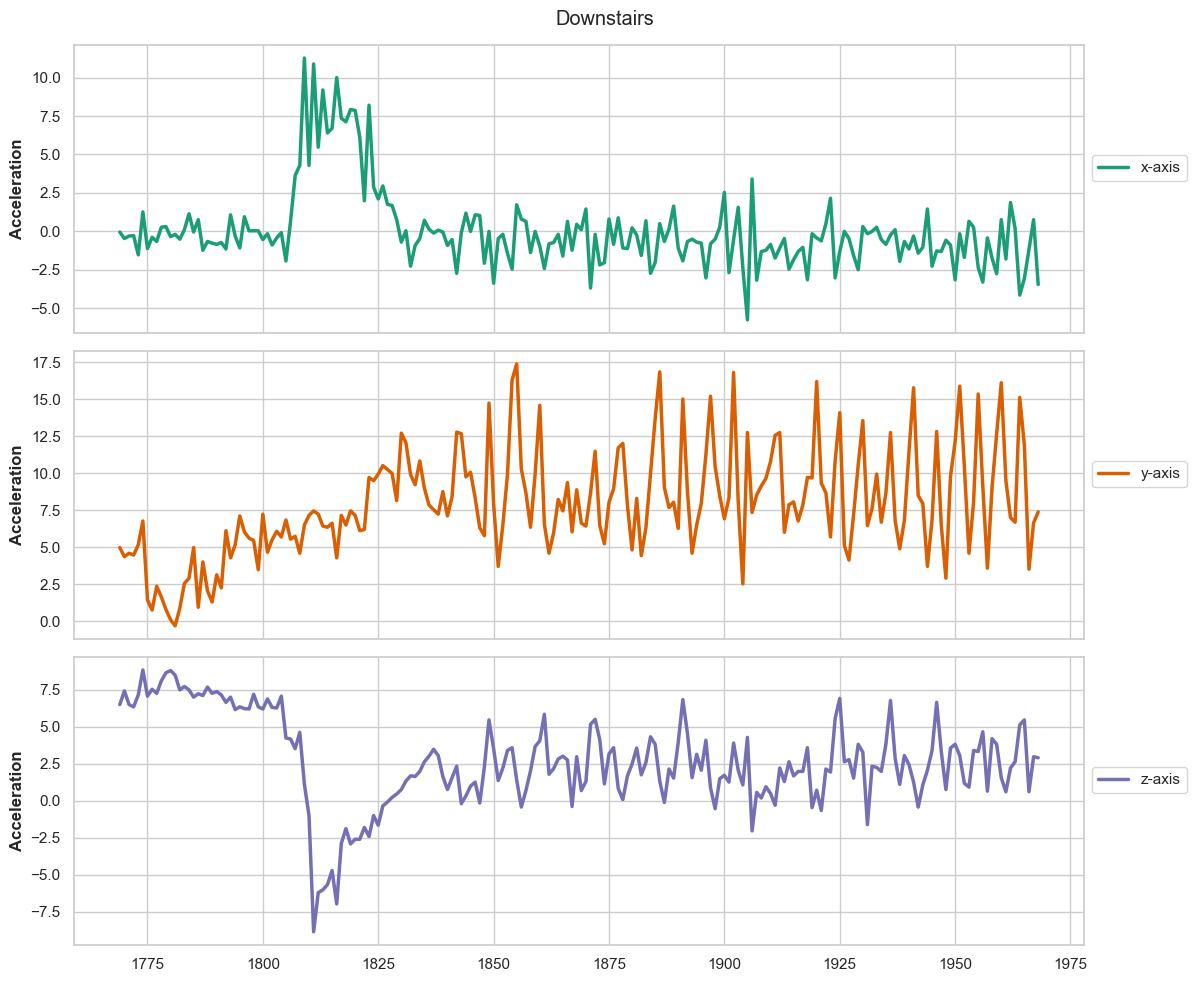

In [ ]:
# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Dark2", 6)  # Changed to a bolder color palette for all activities

def plot_activity(activity, df):
    # Check if the expected column names exist in the DataFrame
    expected_columns = ['x-axis', 'y-axis', 'z-axis']
    if not all(col in df.columns for col in expected_columns):
        raise ValueError("Columns 'x-axis', 'y-axis', and 'z-axis' not found in DataFrame.")

    data = df[df['activity'] == activity][expected_columns][:200]
    axis = data.plot(subplots=True, figsize=(12, 10), title=activity, linewidth=2.5, color=colors)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        ax.set_ylabel('Acceleration', fontsize=12, fontweight='bold')  # Made y-label bold

# List of activities to plot
activities_to_plot = ['Sitting', 'Standing', 'Walking', 'Jogging', 'Upstairs', 'Downstairs']

# Plot each activity
for activity in activities_to_plot:
    plot_activity(activity, df)

plt.tight_layout()
plt.show()

# **DATA PREPROCESSING, BUILDING THE MODEL & TRAINING**

In [ ]:
#Constants defined
N_TIME_STEPS = 200  #Feature Extraction
N_FEATURES = 3

#Loop for segmentation
step = 20
segments = []
labels = []

#Segementation process
for i in range(0, len(df) - N_TIME_STEPS, step):  # will give starting point of each batch
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    # Use np.unique to find the most frequent activity label
    unique_labels, counts = np.unique(df['activity'][i: i + N_TIME_STEPS], return_counts=True)
    label = unique_labels[np.argmax(counts)]
    segments.append([xs, ys, zs])
    labels.append(label)

In [ ]:
np.array(segments).shape

(54314, 3, 200)

In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
reshaped_segments.shape

(54314, 200, 3)

In [ ]:
# Convert labels to a DataFrame
labels_df = pd.DataFrame(labels, columns=['label'])  #Converts the 'labels' list into a pandas Dataframe named

# One-hot encoding
labels = np.asarray(pd.get_dummies(labels_df['label'], dtype = np.float32).values)  #converts categorical variable 'label' into indicator variables(dummy variables)

In [ ]:
print(labels)
print(labels.shape)

[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(54314, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#Feature and Label Selection
X = df[['x-axis', 'y-axis', 'z-axis']]  #Features(input variables) DataFrame
y = df['activity']  #Labels(output variables) Series

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from collections import Counter
import numpy as np

def create_segments_and_labels(df, time_steps, step, label_name):
    N_FEATURES = 3  # number of features (x, y, z axis)
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['x-axis'].values[i: i + time_steps]
        ys = df['y-axis'].values[i: i + time_steps]
        zs = df['z-axis'].values[i: i + time_steps]
        # Retrieve the most common label in the segment
        label = Counter(df[label_name][i: i + time_steps]).most_common(1)[0][0]
        segments.append([xs, ys, zs])
        labels.append(label)
    return np.asarray(segments).reshape(-1, time_steps, N_FEATURES), np.asarray(labels)


In [ ]:
time_steps = 100  #Length of each segments
step = 50  #stride for creating segments

#Create segments and labels
X, y = create_segments_and_labels(df, time_steps, step, 'activity')

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Create the label encoder
encoder = LabelEncoder()

#Fit the label encoder and transform the labels to numerical values
y_encoded = encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

#Assume X and y_encoded are defined and ready for use
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [ ]:
import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

#Sequential Model Initialization
model = Sequential()

#Convolutional Layers (CNN)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 3)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

#Long Short-Term Memory (LSTM)
model.add(LSTM(100))
model.add(Dropout(0.5))

#Dense layer
model.add(Dense(100, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer

#Model Compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Model Summary
print(model.summary())


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 962ms/step - accuracy: 0.3752 - loss: 1.5092 - val_accuracy: 0.6469 - val_loss: 1.0054
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 995ms/step - accuracy: 0.6480 - loss: 0.9697 - val_accuracy: 0.7822 - val_loss: 0.6087
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 922ms/step - accuracy: 0.7881 - loss: 0.6141 - val_accuracy: 0.8234 - val_loss: 0.4689
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8132 - loss: 0.5285 - val_accuracy: 0.8397 - val_loss: 0.4209
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 906ms/step - accuracy: 0.8270 - loss: 0.4721 - val_accuracy: 0.8477 - val_loss: 0.4006
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 907ms/step - accuracy: 0.8437 - loss: 0.4244 - val_accuracy: 0.8627 - val_loss: 0.3745
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 909ms/step - accuracy: 0.8454 - loss: 0.4141 - val_accuracy: 0.8644 - val_loss: 0.3523
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 909ms/step - accuracy: 0.8552 - loss: 0.3880 - val_accurac

In [ ]:
#Evaluation
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9542874693870544


In [ ]:
#Prediction Generation
y_pred_encoded = model.predict(X_test)

#Converting Predictions to Labels
y_pred = np.argmax(y_pred_encoded, axis=1)

#Inverse Label Transformation
y_pred_labels = encoder.inverse_transform(y_pred)
y_test_labels = encoder.inverse_transform(y_test)


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


              precision    recall  f1-score   support

           0       0.78      0.96      0.86       623
           1       1.00      0.97      0.98      2032
           2       0.99      0.94      0.97       343
           3       0.94      0.95      0.95       302
           4       0.86      0.86      0.86       714
           5       1.00      0.97      0.98      2505

    accuracy                           0.95      6519
   macro avg       0.93      0.94      0.93      6519
weighted avg       0.96      0.95      0.96      6519



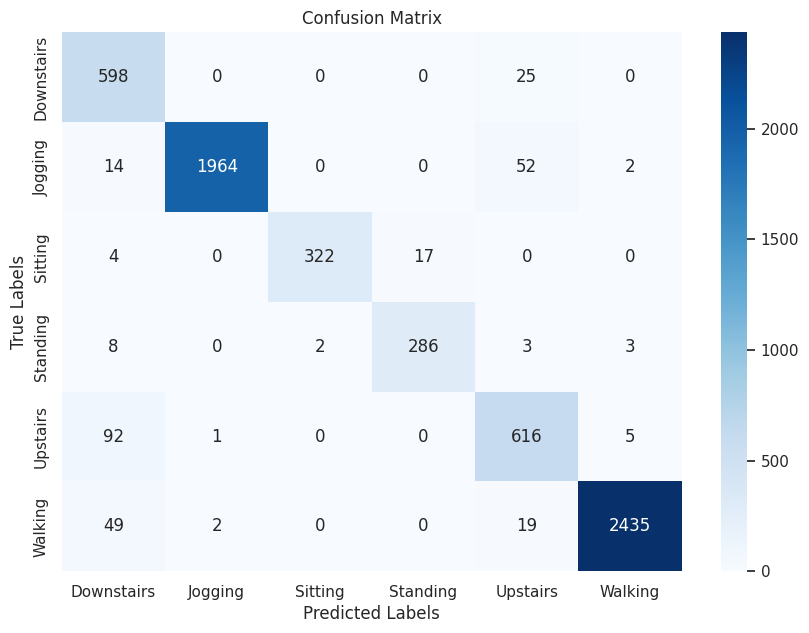

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Classification Report
print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


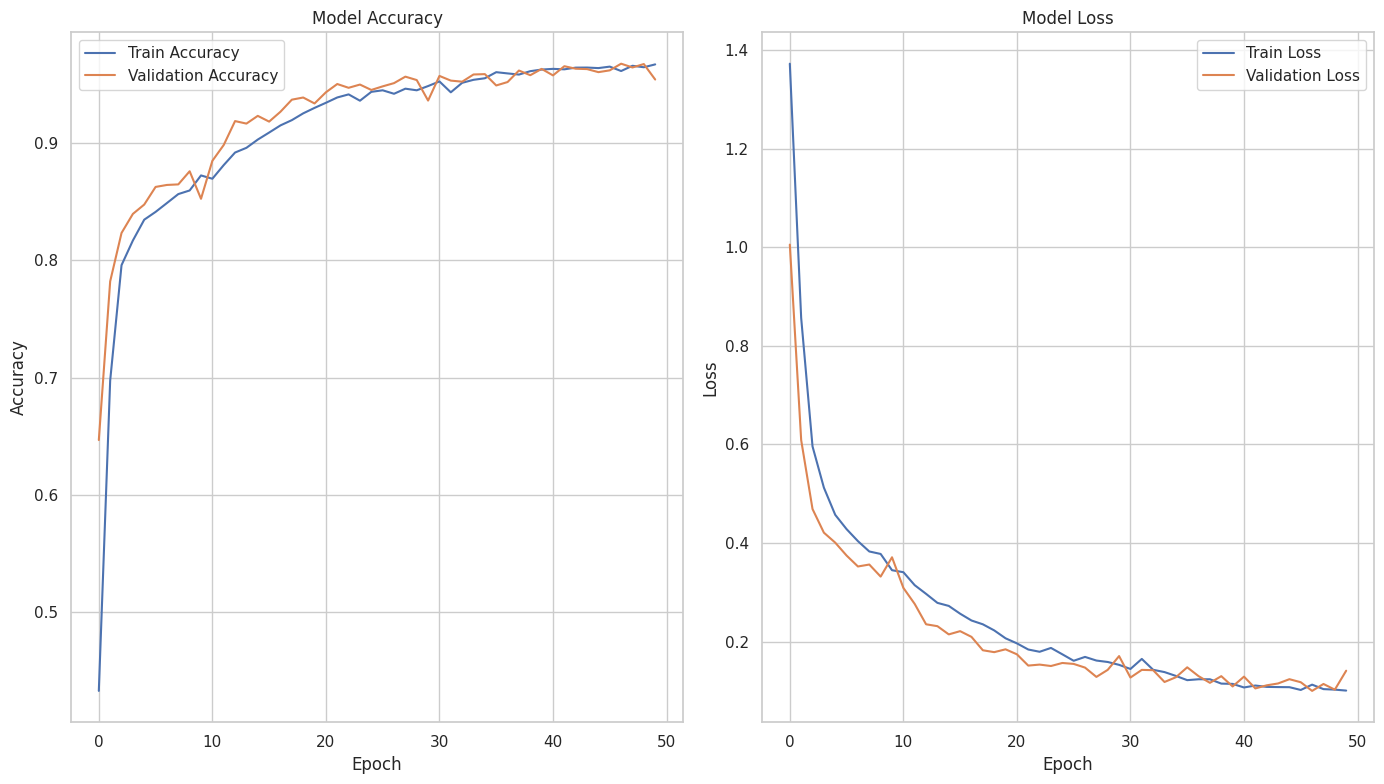

In [ ]:
plt.figure(figsize=(14, 8))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
#Calculate the Range of timestamps
timestamp_range = df['timestamp'].agg(['min', 'max'])

#Print the Timestamp Range
print(f"Timestamp range: \n{timestamp_range}")

Timestamp range: 
min   1970-01-01 00:00:00.000000
max   1970-01-03 10:09:57.361451
Name: timestamp, dtype: datetime64[ns]


In [ ]:
# Extract the date from the timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date


In [ ]:
# Group by user and date to count total occurrences
total_activity_by_user_date = df.groupby(['user', 'date']).size().reset_index(name='total_activity')

# Sort by user and date
total_activity_by_user_date = total_activity_by_user_date.sort_values(by=['user', 'date'])

# Display the results
print("\nTotal activity by user and date:")
print(total_activity_by_user_date)



Total activity by user and date:
    user        date  total_activity
0      1  1970-01-01           29978
1      2  1970-01-01           23525
2      3  1970-01-01               3
3      3  1970-01-02           35158
4      4  1970-01-01           11371
5      5  1970-01-01           28509
6      6  1970-01-01           29704
7      7  1970-01-03           30967
8      8  1970-01-01               1
9      8  1970-01-02           41187
10     9  1970-01-01           12923
11    10  1970-01-01           34883
12    11  1970-01-01           31658
13    12  1970-01-01           32641
14    13  1970-01-01           37092
15    14  1970-01-01           38192
16    15  1970-01-01           28154
17    16  1970-01-01           20469
18    17  1970-01-01           22020
19    18  1970-01-01           32810
20    19  1970-01-01               1
21    19  1970-01-02           45382
22    20  1970-01-01           56632
23    21  1970-01-02           23703
24    22  1970-01-01           22310
25  

In [ ]:
# Define activities and states
activities = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
activity_states = ['Active', 'Moderate', 'Inactive']

In [ ]:
# Define specific ranges for each activity
activity_ranges = {
    'Walking': {
        'Inactive': {'range': (0, 4999)},
        'Moderate': {'range': (5000, 9999)},
        'Active': {'range': (10000, float('inf'))}
    },
    'Jogging': {
        'Inactive': {'range': (0, 2999)},
        'Moderate': {'range': (3000, 5999)},
        'Active': {'range': (6000, float('inf'))}
    },
    'Sitting': {
        'Inactive': {'range': (0, 999)},
        'Moderate': {'range': (1000, 1999)},
        'Active': {'range': (2000, float('inf'))}
    },
    'Standing': {
        'Inactive': {'range': (0, 999)},
        'Moderate': {'range': (1000, 1999)},
        'Active': {'range': (2000, float('inf'))}
    },
    'Upstairs': {
        'Inactive': {'range': (0, 1999)},
        'Moderate': {'range': (2000, 3999)},
        'Active': {'range': (4000, float('inf'))}
    },
    'Downstairs': {
        'Inactive': {'range': (0, 1999)},
        'Moderate': {'range': (2000, 3999)},
        'Active': {'range': (4000, float('inf'))}
    },
}

# Display the defined activity ranges
print("Activity Ranges:")
for activity, ranges in activity_ranges.items():
    print(f"{activity}:")
    for status, range_values in ranges.items():
        print(f"  {status}: {range_values['range']}")


Activity Ranges:
Walking:
  Inactive: (0, 4999)
  Moderate: (5000, 9999)
  Active: (10000, inf)
Jogging:
  Inactive: (0, 2999)
  Moderate: (3000, 5999)
  Active: (6000, inf)
Sitting:
  Inactive: (0, 999)
  Moderate: (1000, 1999)
  Active: (2000, inf)
Standing:
  Inactive: (0, 999)
  Moderate: (1000, 1999)
  Active: (2000, inf)
Upstairs:
  Inactive: (0, 1999)
  Moderate: (2000, 3999)
  Active: (4000, inf)
Downstairs:
  Inactive: (0, 1999)
  Moderate: (2000, 3999)
  Active: (4000, inf)


In [ ]:
# Function to categorize activities based on specific activity ranges
def categorize_activity(row):
    activity_counts = row.to_dict()
    activity_status = {}
    for activity, count in activity_counts.items():
        if activity in activity_ranges:
            if count < activity_ranges[activity]['Inactive']['range'][1]:
                activity_status[activity] = 'Inactive'
            elif count < activity_ranges[activity]['Moderate']['range'][1]:
                activity_status[activity] = 'Moderate'
            else:
                activity_status[activity] = 'Active'
    return activity_status

# Group by user, date, and activity to count occurrences
activity_counts_by_day = df.groupby(['user', 'date', 'activity']).size().unstack(fill_value=0)

# Apply categorization to each row (user, date, activity combination)
activity_status_by_day = activity_counts_by_day.apply(categorize_activity, axis=1)

# Display the results
print("\nActivity counts by day with activity status:")
print(activity_counts_by_day)


Activity counts by day with activity status:
activity         Downstairs  Jogging  Sitting  Standing  Upstairs  Walking
user date                                                                 
1    1970-01-01        2941    11056        0         0      3120    12861
2    1970-01-01           0    11786        0         0         0    11739
3    1970-01-01           0        0        0         0         0        3
     1970-01-02        3326    11018     1609      2824      3411    12970
4    1970-01-01        1763      895     1257         0      1377     6079
5    1970-01-01        3281     6405     1664      1515      3387    12257
6    1970-01-01        1433    11818     1679       709      1666    12399
7    1970-01-03        2257     9183     2529      2364      3601    11033
8    1970-01-01           1        0        0         0         0        0
     1970-01-02        3345    10313     2699      3269      4453    17108
9    1970-01-01           0        0        0         

In [ ]:
# Convert the activity status dictionary into a DataFrame
activity_status_df = pd.DataFrame(activity_status_by_day.tolist(), index=activity_status_by_day.index)

# Display the results
print("\nActivity status by day:")
print(activity_status_df)



Activity status by day:
                Downstairs   Jogging   Sitting  Standing  Upstairs   Walking
user date                                                                   
1    1970-01-01   Moderate    Active  Inactive  Inactive  Moderate    Active
2    1970-01-01   Inactive    Active  Inactive  Inactive  Inactive    Active
3    1970-01-01   Inactive  Inactive  Inactive  Inactive  Inactive  Inactive
     1970-01-02   Moderate    Active  Moderate    Active  Moderate    Active
4    1970-01-01   Inactive  Inactive  Moderate  Inactive  Inactive  Moderate
5    1970-01-01   Moderate    Active  Moderate  Moderate  Moderate    Active
6    1970-01-01   Inactive    Active  Moderate  Inactive  Inactive    Active
7    1970-01-03   Moderate    Active    Active    Active  Moderate    Active
8    1970-01-01   Inactive  Inactive  Inactive  Inactive  Inactive  Inactive
     1970-01-02   Moderate    Active    Active    Active    Active    Active
9    1970-01-01   Inactive  Inactive  Inactive  Ina

In [ ]:
# Define scores for each activity status
status_scores = {
    'Inactive': 0,
    'Moderate': 1,
    'Active': 2
}

In [ ]:
# Function to determine overall status based on activity status scores
def determine_overall_status(row):
    total_score = sum(status_scores[status] for status in row if status in status_scores)
    if total_score >= 9:
        return 'Active'
    elif total_score >= 5:
        return 'Moderate'
    else:
        return 'Inactive'

# Apply the function to determine overall status
activity_status_df['Overall Status'] = activity_status_df.apply(determine_overall_status, axis=1)

# Display the overall status by day
print("\nOverall status by day:")
print(activity_status_df[['Overall Status']])


Overall status by day:
                Overall Status
user date                     
1    1970-01-01       Moderate
2    1970-01-01       Inactive
3    1970-01-01       Inactive
     1970-01-02         Active
4    1970-01-01       Inactive
5    1970-01-01       Moderate
6    1970-01-01       Moderate
7    1970-01-03         Active
8    1970-01-01       Inactive
     1970-01-02         Active
9    1970-01-01       Inactive
10   1970-01-01       Moderate
11   1970-01-01       Moderate
12   1970-01-01         Active
13   1970-01-01         Active
14   1970-01-01       Moderate
15   1970-01-01       Moderate
16   1970-01-01       Moderate
17   1970-01-01       Inactive
18   1970-01-01       Moderate
19   1970-01-01       Inactive
     1970-01-02         Active
20   1970-01-01         Active
21   1970-01-02         Active
22   1970-01-01       Moderate
23   1970-01-01       Moderate
24   1970-01-01       Moderate
25   1970-01-01       Inactive
26   1970-01-01       Moderate
27   1970-01-01

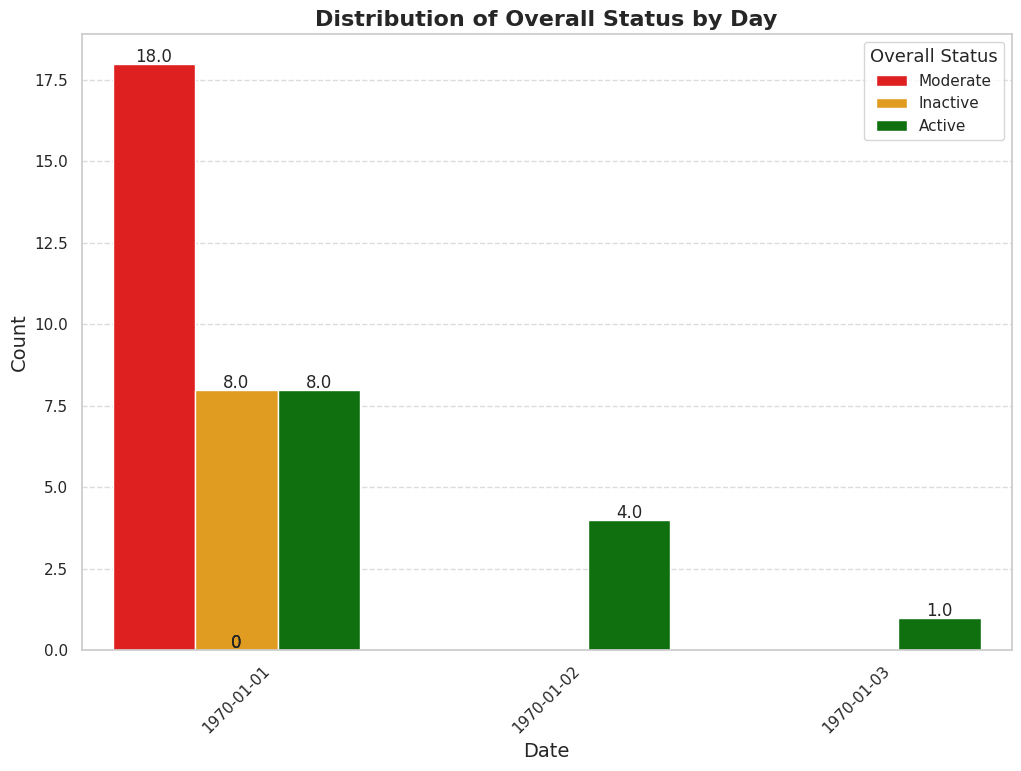

In [ ]:
# Plotting the distributions of the overall status by day
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=activity_status_df.reset_index(), x='date', hue='Overall Status', palette=['red', 'orange', 'green'])

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customizing the plot
plt.title('Distribution of Overall Status by Day', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Overall Status', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ipywidgets as widgets

# Define user activity data
user_activity_data = []

# Define activities and states
activities = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
activity_states = ['Active', 'Moderate', 'Inactive']

# Generate data for each user across all time periods
users = ['User 1', 'User 2', 'User 3', 'User 4', 'User 5', 'User 6', 'User 7', 'User 8', 'User 9',
         'User 10', 'User 11', 'User 12', 'User 13', 'User 14', 'User 15', 'User 16', 'User 17',
         'User 18', 'User 19', 'User 20', 'User 21', 'User 22', 'User 23', 'User 24', 'User 25',
         'User 26', 'User 27', 'User 28', 'User 29', 'User 30', 'User 31', 'User 32', 'User 33',
         'User 34', 'User 35', 'User 36']

# Generate time periods for the specified dates, in 60-minute intervals
start_date = "1970-01-01"
end_date = "1970-01-03"
time_periods = pd.date_range(start=start_date, end=end_date, freq='H')

for user in users:
    for timestamp in time_periods:
        activity = np.random.choice(activities)
        activity_state = np.random.choice(activity_states, p=[0.5, 0.3, 0.2])  # Adjust probabilities as needed
        user_activity_data.append({
            'user': user,
            'timestamp': timestamp,
            'activity': activity,
            'activity_state': activity_state
        })

/tmp/ipython-input-40-716342033.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_periods = pd.date_range(start=start_date, end=end_date, freq='H')


In [ ]:
# Create DataFrame
df = pd.DataFrame(user_activity_data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate daily activity counts for each user
daily_activities = df.groupby(['user', df['timestamp'].dt.date, 'activity_state']).size().unstack(fill_value=0)

In [ ]:
# Map dates to days of the week
date_to_day_map = {
    pd.to_datetime('1970-01-01').date(): 'Thursday',
    pd.to_datetime('1970-01-02').date(): 'Friday',
    pd.to_datetime('1970-01-03').date(): 'Saturday'
}

In [ ]:
# Widgets
user_widget = widgets.Dropdown(options=df['user'].unique(),
                               description='User:')
day_widget = widgets.Dropdown(description='Day:', options=
 ['Thursday', 'Friday', 'Saturday'])
output = widgets.Output()
graph_output = widgets.Output()
pie_output = widgets.Output()

In [ ]:
# Function to update date options based on selected user
def update_day_options(*args):
    selected_user = user_widget.value
    available_dates = df[df['user'] == selected_user]['timestamp'].dt.date.unique()
    available_days = [date_to_day_map[date] for date in available_dates]
    day_widget.options = available_days

In [ ]:
# Define scores for each activity status
status_scores = {
    'Inactive': 0,
    'Moderate': 1,
    'Active': 2
}

In [ ]:
# Function to determine overall status based on activity status scores
def determine_overall_status(user, selected_day):
    # Get the corresponding date for the selected day
    selected_date = [date for date, day in date_to_day_map.items() if day == selected_day][0]

    # Check if the user and date combination exists in the daily activities DataFrame
    if (user, selected_date) not in daily_activities.index:
        return 'No activity data found for this date'

    # Get the row corresponding to the user and date
    row = daily_activities.loc[(user, selected_date)]
    # Calculate the total score based on activity counts and their scores
    total_score = sum(row[status] * status_scores[status] for status in row.index if status in status_scores)

    # Determine the overall status based on the total score
    if total_score >= 32:
        return 'Active'
    elif total_score >= 24:
        return 'Moderate'
    else:
        return 'Inactive'

In [ ]:
# Function to print overall status for all users on all dates
def print_overall_status_for_all_users():
    # Iterate through each unique user in the DataFrame
    for user in df['user'].unique():
        # For each user, iterate through each unique date
        for date in df[df['user'] == user]['timestamp'].dt.date.unique():
            # Determine the overall status for the user on the date
            overall_status = determine_overall_status(user, date_to_day_map[date])
            # Print the overall status
            print(f"Overall status for {user} on {date_to_day_map[date]}: {overall_status}")

# Print overall status for all users on all dates
print_overall_status_for_all_users()

Overall status for User 1 on Thursday: Active
Overall status for User 1 on Friday: Moderate
Overall status for User 1 on Saturday: Inactive
Overall status for User 2 on Thursday: Moderate
Overall status for User 2 on Friday: Active
Overall status for User 2 on Saturday: Inactive
Overall status for User 3 on Thursday: Moderate
Overall status for User 3 on Friday: Active
Overall status for User 3 on Saturday: Inactive
Overall status for User 4 on Thursday: Moderate
Overall status for User 4 on Friday: Moderate
Overall status for User 4 on Saturday: Inactive
Overall status for User 5 on Thursday: Moderate
Overall status for User 5 on Friday: Moderate
Overall status for User 5 on Saturday: Inactive
Overall status for User 6 on Thursday: Moderate
Overall status for User 6 on Friday: Active
Overall status for User 6 on Saturday: Inactive
Overall status for User 7 on Thursday: Active
Overall status for User 7 on Friday: Moderate
Overall status for User 7 on Saturday: Inactive
Overall status f

In [ ]:
# Event handlers for widget changes
user_widget.observe(update_day_options, 'value')

In [ ]:
# Function to update overall status based on selected user and day
def update_overall_status(change):
    output.clear_output()
    graph_output.clear_output()
    pie_output.clear_output()
    selected_user = user_widget.value
    selected_day = day_widget.value

    overall_status = determine_overall_status(selected_user, selected_day)

    # Determine color based on status
    if overall_status == 'Active':
        color = 'green'
    elif overall_status == 'Moderate':
        color = 'yellow'
    else:
        color = 'red'

    with output:
        display(HTML(f'<p style="color:{color}; font-weight:bold;">Overall status for {selected_user} on {selected_day}: {overall_status}</p>'))

    # Plot activity state graph
    with graph_output:
        selected_date = [date for date, day in date_to_day_map.items() if day == selected_day][0]
        user_data = df[(df['user'] == selected_user) & (df['timestamp'].dt.date == selected_date)]
        if not user_data.empty:
            # Assign numerical values to each activity for plotting
            activity_map = {activity: idx for idx, activity in enumerate(activities)}

            plt.figure(figsize=(12, 6))
            for activity in activities:
                activity_df = user_data[user_data['activity'] == activity]
                plt.plot(activity_df['timestamp'].dt.hour, [activity_map[activity]] * len(activity_df), 'o', label=activity)

            plt.title(f'Activity State for {selected_user} on {selected_day}')
            plt.xlabel('Hour of the Day')
            plt.ylabel('Activity')
            plt.yticks(list(activity_map.values()), list(activity_map.keys()))
            plt.xticks(range(24))  # Show all 24 hours on x-axis
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"No activity data found for {selected_user} on {selected_day}")

    # Pie chart for activity distribution
    with pie_output:
        countOfActivity = user_data['activity'].value_counts()
        labels = countOfActivity.index
        sizes = countOfActivity.values
        colors = ['#b3ac2d', '#33FF57', '#3357FF', '#FF33D4', '#33FFF6', '#FFF633']  # Custom colors for each slice
        explode = [0.1] + [0] * (len(labels) - 1)  # Explode the first slice slightly to highlight it

        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
        plt.title(f'Activity Distribution for {selected_user} on {selected_day}', fontsize=18, fontweight='bold', color='purple')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.legend(labels, title="Activities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.show()

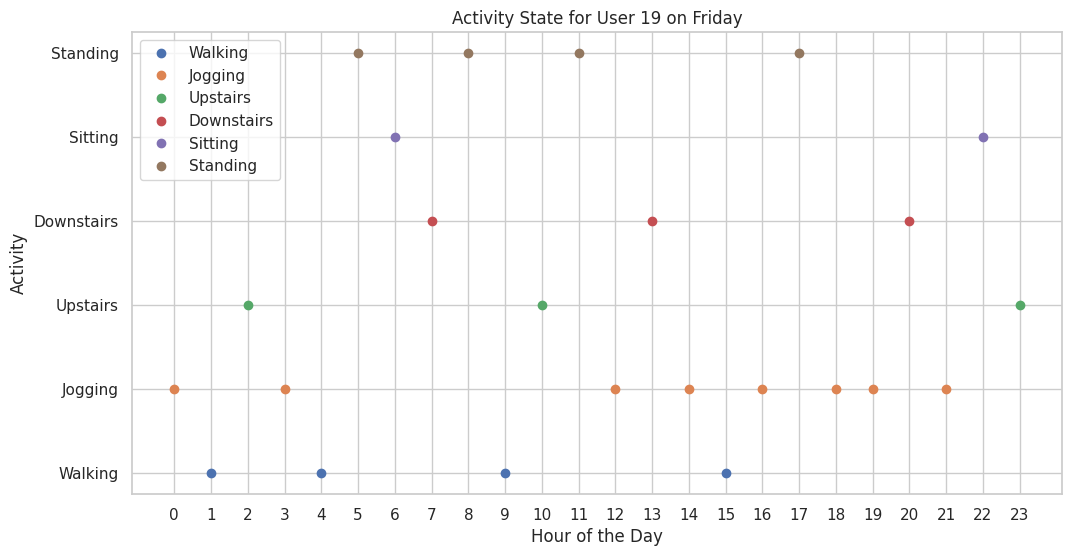

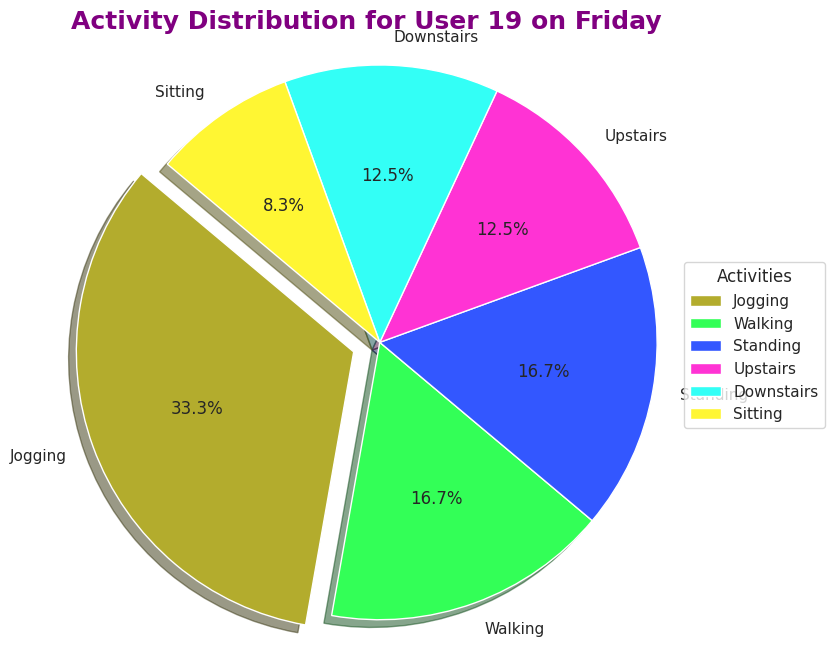

In [ ]:
# Event handler for day selection change
day_widget.observe(update_overall_status, 'value')

# Initial update for day options
update_day_options()

# Display widgets
display(widgets.VBox([user_widget, day_widget, output, graph_output, pie_output]))